In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [69]:
data = pd.read_csv("data/used_car_prices/used_cars_data.csv")

## Analizando los datos

In [70]:
data.shape

(7253, 14)

In [71]:
data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


Preguntas sobre los datos:
- Qué tipo de variables tengo?
- Hay valores faltantes?

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


Utilizando la información proporcionada `data.info()`, podemos responder a las consultas anteriores:

- Algunas de las variables en el conjunto de datos tienen valores faltantes. Específicamente, las variables "Mileage", "Engine", "Power", "Seats", "New_Price" y "Price" tienen valores faltantes ('missing values').

- Características como 'Mileage' (consumo), 'Engine' (motor) y 'Power' (potencia) son de tipo cadena de texto y solo necesitamos el valor numérico y no su unidad. 

- Otra cosa importante a tener en cuenta son las unidades, no son consistentes, algunas son km/kg y otras kmpl. También extraeremos estas características.

- Las variables categóricas como "Location", "Fuel_Type", "Transmission" y "Owner Type" tienen tipo de datos de objeto.

- El dataset tiene una mezcla de variables numéricas y categóricas.

- Utilizando la función `nunique()` para determinar el número de valores únicos en cada columna, se pueden identificar las variables continuas y categóricas en el conjunto de datos. Las variables continuas serán aquellas que tienen un número relativamente alto de valores únicos, mientras que las variables categóricas tendrán un número menor de valores únicos.

- Una vez identificadas las variables continuas y categóricas, se puede proceder a manejar los valores faltantes de manera apropiada, ya sea mediante imputación o eliminación, dependiendo del análisis específico que se vaya a realizar.

- Asimismo, se pueden identificar y manejar los registros duplicados en el conjunto de datos, ya sea conservando solo uno de los registros duplicados o eliminándolos por completo, según lo requiera el análisis.

In [73]:
data.nunique()

S.No.                7253
Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               450
Engine                150
Power                 386
Seats                   9
New_Price             625
Price                1373
dtype: int64

In [74]:
#Converting to string and extracting first value, then converting to float
data['Engine'] = data['Engine'].astype(str).map(lambda x : x.split(' ')[0]).replace('nan' , np.nan).astype(np.float)

data['Power'] = data['Power'].astype(str).map(lambda x : x.split(' ')[0]).replace('null' , np.nan).astype(np.float)

data['New_Price']= data['New_Price'].astype(str).map(lambda x : x.split(' ')[0]).replace('null' , np.nan).astype(np.float)


In [75]:
#since mileage has two units, to keep it consistent, we will convert the km/kg to km/l
def mileage_convert(x):
    if type(x) == str:
        if x.split()[-1] == 'km/kg':
            return float(x.split()[0])*1.40 #formula
        elif x.split()[-1] == 'kmpl':
            return float(x.split()[0])
    else:
        return x
    
data['Mileage'] = data['Mileage'].apply(mileage_convert)

data = data.rename(columns={'Engine': 'Engine(cc)', 'Power': 'Power(bph)', 'Mileage': 'Mileage(km/l)', 'New_Price': 'New_Price(Lakh)'})


In [76]:
data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage(km/l),Engine(cc),Power(bph),Seats,New_Price(Lakh),Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,37.24,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


### Registros duplicados

Identificar y manejar adecuadamente los registros duplicados es un paso importante en el proceso de limpieza y preparación de los datos. 

La presencia de registros duplicados en un conjunto de datos puede tener un impacto significativo en la calidad y la precisión de los análisis y modelos que se apliquen sobre ellos. 

Existen varias razones por las cuales es importante identificar y manejar adecuadamente los registros duplicados:

- Precisión del análisis: Cuando hay registros duplicados en el conjunto de datos, cada observación se está contando más de una vez. Esto puede sesgar los resultados de cualquier análisis o modelo que se aplique, ya que las duplicaciones están dando un peso excesivo a ciertos patrones o características en los datos. Al eliminar los registros duplicados, se asegura que cada observación se cuenta solo una vez.

- Eficiencia computacional: Los registros duplicados innecesariamente aumentan el tamaño del conjunto de datos. Esto puede ralentizar los procesos de cálculo y análisis, ya que hay que procesar una cantidad de información mayor de la necesaria. Eliminar los duplicados permite trabajar con un conjunto de datos más compacto y eficiente desde el punto de vista computacional.

- Integridad de los datos: La presencia de registros duplicados a menudo es indicativa de problemas en los procesos de recolección, integración o almacenamiento de los datos. Identificar y resolver estos problemas de calidad de los datos mejora la integridad general del conjunto de información.

- Facilidad de análisis: Tener un conjunto de datos sin registros duplicados simplifica y facilita la aplicación de técnicas de análisis, visualización y modelado. Al trabajar con un conjunto de datos más limpio y coherente, se reducen las complejidades y problemas que podrían surgir debido a la duplicación de información.

- Almacenamiento y transferencia de datos: Eliminar los registros duplicados reduce el tamaño total del conjunto de datos. Esto mejora la eficiencia en términos de almacenamiento y transferencia de la información, lo cual es especialmente relevante cuando se trabaja con grandes volúmenes de datos.

### Valores faltantes

`isnull()` es ampliamente utilizado en todos los pasos de preprocesamiento para identificar los valores nulos en los datos.

En nuestro ejemplo, `data.isnull().sum()` se usa para obtener el número de registros faltantes en cada columna.

In [77]:
data.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage(km/l)           2
Engine(cc)             46
Power(bph)            175
Seats                  53
New_Price(Lakh)      6247
Price                1234
dtype: int64

In [78]:
(data.isnull().sum()/(len(data)))*100

S.No.                 0.000000
Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage(km/l)         0.027575
Engine(cc)            0.634220
Power(bph)            2.412795
Seats                 0.730732
New_Price(Lakh)      86.129877
Price                17.013650
dtype: float64

### Reducción de datos

Algunas columnas o variables se pueden eliminar si no aportan valor a nuestro análisis.

En nuestro conjunto de datos, la columna "S.No" contiene solo valores de identificación, por lo que se asume no tienen ningún poder predictivo para predecir la variable dependiente.

In [79]:
# Remove S.No. column from data
data = data.drop(['S.No.'], axis = 1)

### Feature Engineering 

El feature engineering (o ingeniería de características) se refiere al proceso de utilizar conocimientos del dominio para seleccionar y transformar las variables más relevantes a partir de los datos brutos, cuando se crea un modelo predictivo utilizando aprendizaje automático o modelado estadístico. 

El objetivo principal del feature engineering es crear datos significativos a partir de datos brutos.

#### Creación de features

Jugaremos con las variables "Año" y "Nombre" en nuestro conjunto de datos. Si observamos los datos de muestra, la columna "Año" muestra el año de fabricación del automóvil.

Sabemos que la edad del automóvil es un factor que contribuye al precio del automóvil. Sería mejor tener este feature, en lugar de utilizar el año de fabricación.

Introduciremos una nueva columna, "Car_Age", para conocer la edad del automóvil.

In [80]:
from datetime import date
date.today().year
data['Car_Age']=date.today().year-data['Year']
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage(km/l),Engine(cc),Power(bph),Seats,New_Price(Lakh),Price,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,37.24,998.0,58.16,5.0,NaN,1.75,14
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,9
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,13
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,12
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,11


Dado que los nombres de los automóviles no serán grandes predictores del precio en nuestros datos actuales, podemos procesar esta columna para extraer información importante utilizando las marcas y los nombres de los modelos. 

Dividamos el nombre e introduzcamos nuevas variables "Marca" y "Modelo".

In [81]:
data['Brand'] = data.Name.str.split().str.get(0)
data['Model'] = data.Name.str.split().str.get(1) + data.Name.str.split().str.get(2)
data[['Name','Brand','Model']]

,Name,Brand,Model
0,Maruti Wagon R LXI CNG,Maruti,WagonR
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Creta1.6
2,Honda Jazz V,Honda,JazzV
3,Maruti Ertiga VDI,Maruti,ErtigaVDI
4,Audi A4 New 2.0 TDI Multitronic,Audi,A4New
...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Volkswagen,VentoDiesel
7249,Volkswagen Polo GT TSI,Volkswagen,PoloGT
7250,Nissan Micra Diesel XV,Nissan,MicraDiesel
7251,Volkswagen Polo GT TSI,Volkswagen,PoloGT


### Limpieza/reordenamiento de datos

- Algunos nombres de variables no son relevantes y no son fáciles de entender. 

- Algunos datos pueden tener errores de ingreso de datos y algunas variables pueden necesitar conversión de tipo de datos. Necesitamos solucionar este problema en los datos.



In [82]:
print(data.Brand.unique())
print(data.Brand.nunique())

['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra' 'Ford'
 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda' 'Mini' 'Fiat'
 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'ISUZU' 'Force' 'Bentley'
 'Lamborghini' 'Hindustan' 'OpelCorsa']
33


En el ejemplo, los nombres de marca 'Isuzu', 'ISUZU' y 'Mini' y 'Land' parecen incorrectos. 
Esto debe corregirse.

In [83]:
searchfor = ['Isuzu' ,'ISUZU','Mini','Land']
data[data.Brand.str.contains('|'.join(searchfor))].head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage(km/l),Engine(cc),Power(bph),Seats,New_Price(Lakh),Price,Car_Age,Brand,Model
13,Land Rover Range Rover 2.2L Pure,Delhi,2014,72000,Diesel,Automatic,First,12.70,2179.0,187.70,5.0,NaN,27.00,10,Land,RoverRange
14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,0.00,2179.0,115.00,5.0,NaN,17.50,12,Land,RoverFreelander
176,Mini Countryman Cooper D,Jaipur,2017,8525,Diesel,Automatic,Second,16.60,1998.0,112.00,5.0,NaN,23.00,7,Mini,CountrymanCooper
191,Land Rover Range Rover 2.2L Dynamic,Coimbatore,2018,36091,Diesel,Automatic,First,12.70,2179.0,187.70,5.0,NaN,55.76,6,Land,RoverRange
228,Mini Cooper Convertible S,Kochi,2017,26327,Petrol,Automatic,First,16.82,1998.0,189.08,4.0,44.28,35.67,7,Mini,CooperConvertible


In [84]:
data["Brand"].replace({"ISUZU": "Isuzu", "Mini": "Mini Cooper","Land":"Land Rover"}, inplace=True)


## Análisis exploratorio de datos

El Análisis Exploratorio de Datos (EDA, por sus siglas en inglés) se refiere al proceso crucial de realizar investigaciones iniciales sobre los datos para descubrir patrones y verificar suposiciones con la ayuda de estadísticas resumen y representaciones gráficas.

- El EDA se puede aprovechar para verificar la presencia de valores atípicos, patrones y tendencias en los datos dados.

- El EDA ayuda a encontrar patrones significativos en los datos.

- El EDA proporciona conocimientos profundos sobre los conjuntos de datos para resolver nuestros problemas de negocio.

- El EDA da una pista para imputar los valores faltantes en el conjunto de datos.

### ¿Qué preguntas o hipótesis podemos hacer a priori sobre los datos? ¿Cómo responderlas?

### Resumen estadístico

La información brinda una descripción rápida y sencilla de los datos.

Puede incluir recuento, media, desviación estándar, mediana, moda, valor mínimo, valor máximo, rango, desviación estándar, etc.

El resumen estadístico da una idea general para identificar si los datos tienen algún valor atípico, error de ingreso de datos, distribución de datos como si los datos se distribuyen normalmente o están sesgados hacia la izquierda/derecha.

En Python, esto se puede lograr usando el método `describe()`.

La función `describe()` proporciona un resumen estadístico de todos los datos.

`describe()` - Proporciona un resumen estadístico de los datos pertenecientes a tipos de datos numéricos como int y float.

In [86]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7253.0,2013.365366,3.254421,1996.00,2011.000,2014.00,2016.00,2019.000
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.000,53416.00,73000.00,6500000.000
Mileage(km/l),7251.0,18.240986,4.839919,0.00,15.260,18.20,21.10,46.956
Engine(cc),7207.0,1616.573470,595.285137,72.00,1198.000,1493.00,1968.00,5998.000
Power(bph),7078.0,112.765214,53.493553,34.20,75.000,94.00,138.10,616.000
Seats,7200.0,5.279722,0.811660,0.00,5.000,5.00,5.00,10.000
New_Price(Lakh),1006.0,19.894324,19.813947,1.00,7.635,11.27,23.64,99.920
Price,6019.0,9.479468,11.187917,0.44,3.500,5.64,9.95,160.000
Car_Age,7253.0,10.634634,3.254421,5.00,8.000,10.00,13.00,28.000


A partir del resumen estadístico, podemos inferir las siguientes conclusiones:

- Los años varían desde 1996 hasta 2019 y muestran una alta variabilidad, lo que indica que los autos usados incluyen tanto modelos recientes como modelos antiguos.

- En promedio, los autos usados tienen alrededor de 58,000 km recorridos. La diferencia entre el valor mínimo y el valor máximo es significativa, ya que el valor máximo de 650,000 km indica la presencia de un valor atípico. 

- El valor mínimo de Mileage muestra que no hay autos que se vendan con un kilometraje de 0. Esto parece ser un problema de entrada de datos.

- Parece que tanto Engine (motor) como Power (potencia) tienen valores atípicos y los datos están sesgados hacia la derecha.

- El promedio de asientos en un automóvil es de 5. El número de asientos en un automóvil es una característica importante que contribuye al precio (hipótesis).

- El precio máximo de un automóvil usado es de 160,000, lo cual es bastante extraño para un automóvil usado. Puede haber un valor atípico o un problema de entrada de datos.


describe(include='all') proporciona un resumen estadístico de todos los datos, incluyendo objetos, categorías, etc.

Antes de realizar el EDA, separemos las variables numéricas y categóricas para facilitar el análisis.

In [88]:
cat_cols=data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand',
       'Model'],
      dtype='object')
Numerical Variables:
['Year', 'Kilometers_Driven', 'Mileage(km/l)', 'Engine(cc)', 'Power(bph)', 'Seats', 'New_Price(Lakh)', 'Price', 'Car_Age']


### Análisis univariado: 

#### Analizando/visualizando el conjunto de datos tomando una variable a la vez

La visualización de datos es esencial; debemos decidir qué gráficos trazar para comprender mejor los datos. 

El análisis univariado se puede realizar tanto para variables categóricas como numéricas.

Las variables categóricas se pueden visualizar utilizando un gráfico de barras, un gráfico circular, etc.

Las variables numéricas se pueden visualizar utilizando un histograma, un diagrama de caja, un gráfico de densidad, etc.


### Posibles preguntas

- ¿Cuál es la distribución de las variables numéricas?

- ¿Existen valores atípicos o outliers en las variables numéricas?

- ¿Cuáles son las categorías y sus frecuencias en las variables categóricas?

- ¿Cuáles son los valores más comunes en las variables categóricas?

- ¿Cuál es la variabilidad en las variables numéricas?

- ¿Hay desequilibrio de clases en las variables categóricas?

- ¿Hay desviaciones o asimetría en las distribuciones de las variables numéricas?

Year
Skew : -0.84


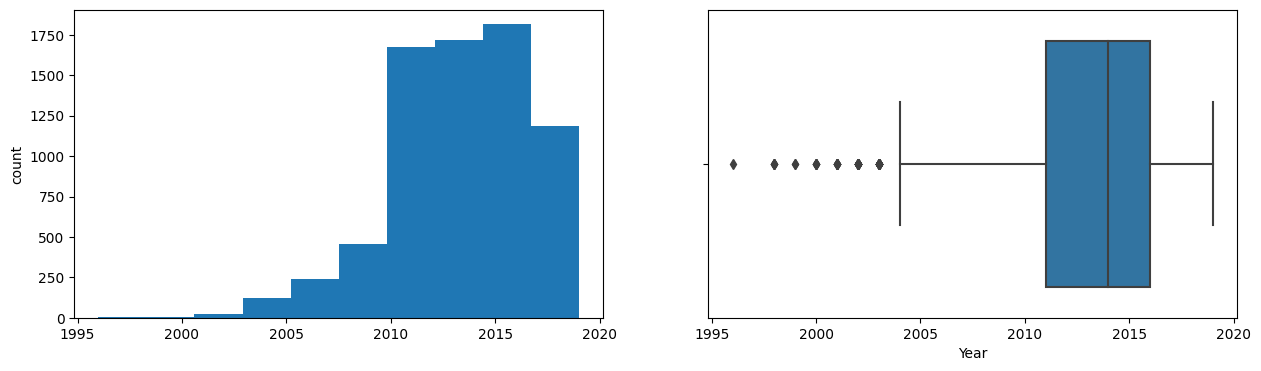

Kilometers_Driven
Skew : 61.58


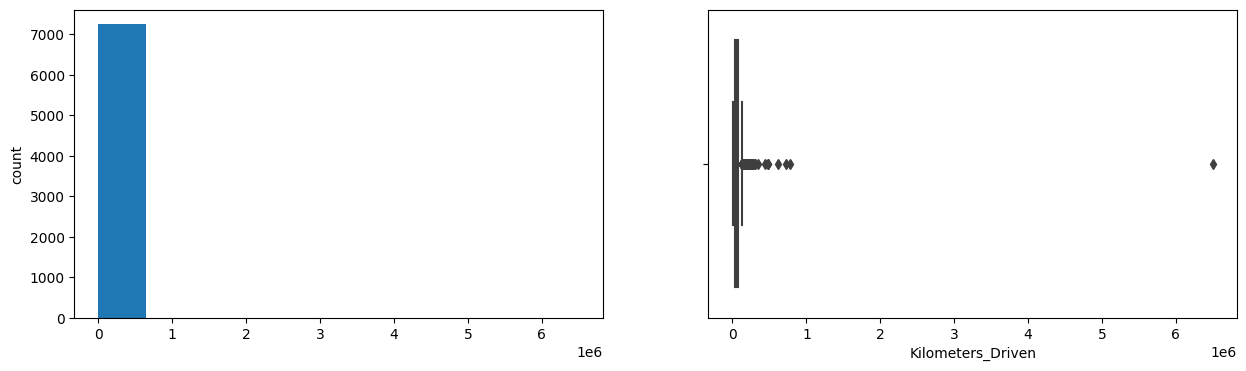

Mileage(km/l)
Skew : 0.19


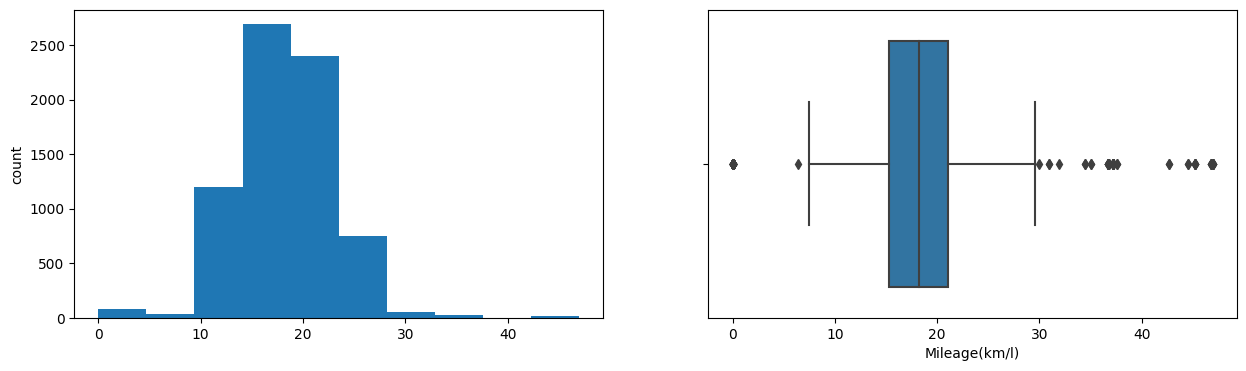

Engine(cc)
Skew : 1.41


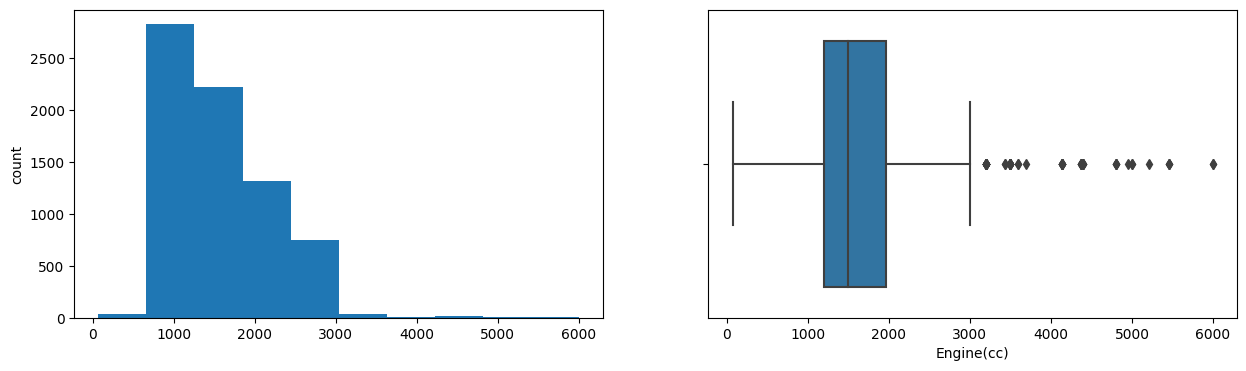

Power(bph)
Skew : 1.96


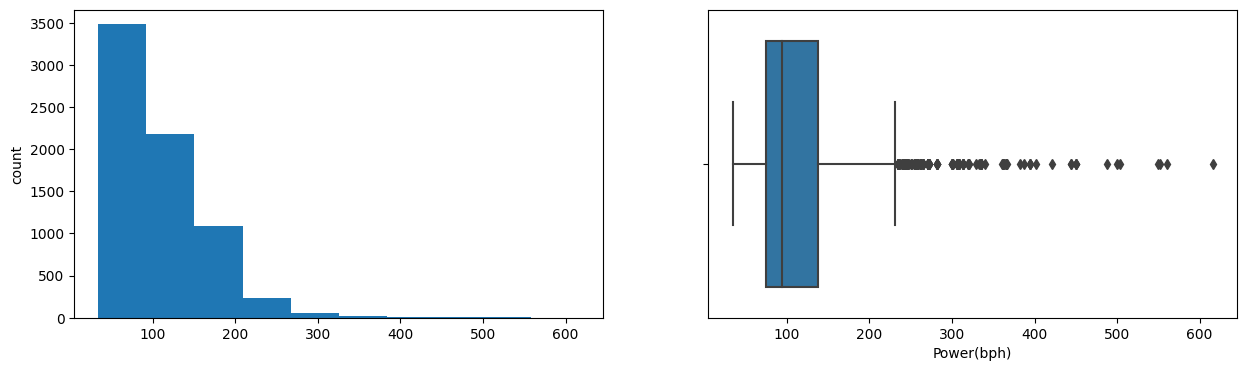

Seats
Skew : 1.9


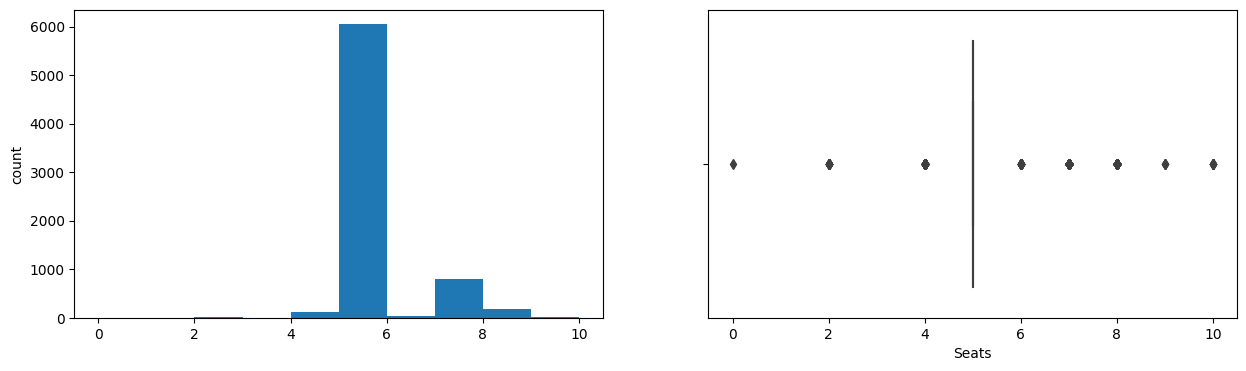

New_Price(Lakh)
Skew : 1.84


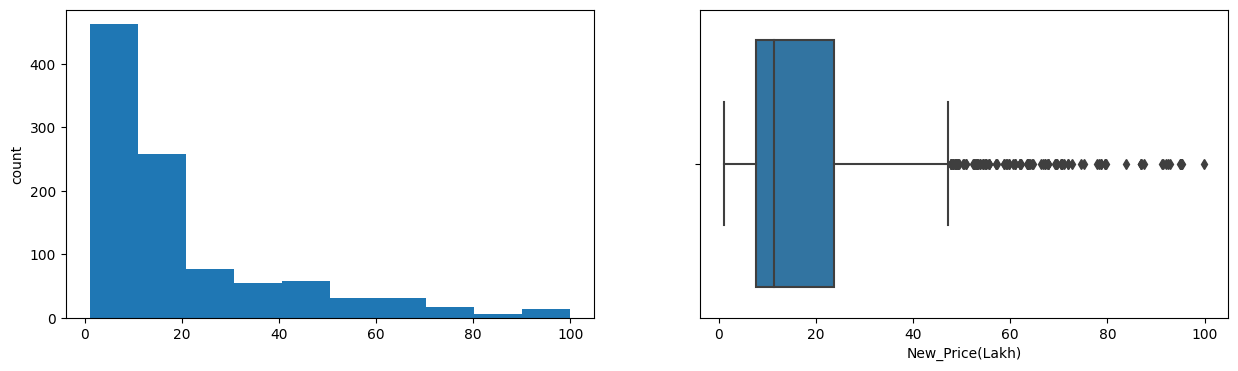

Price
Skew : 3.34


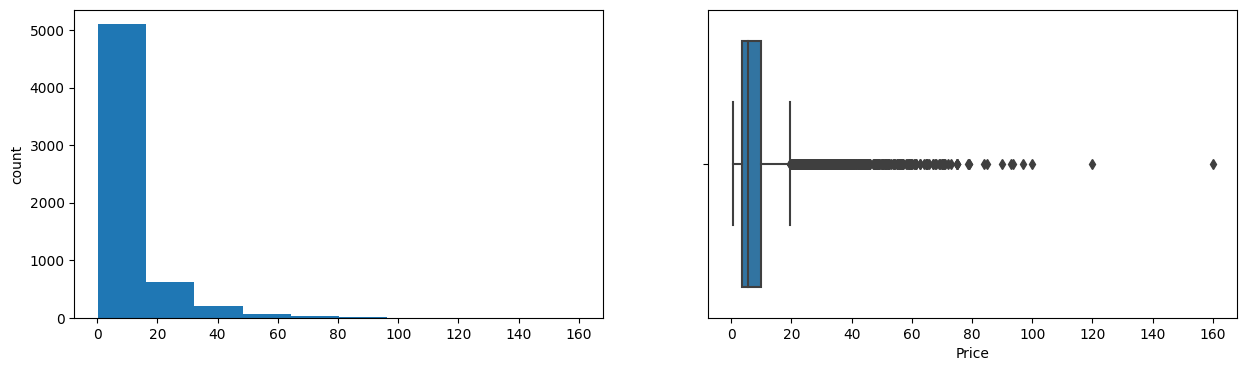

Car_Age
Skew : 0.84


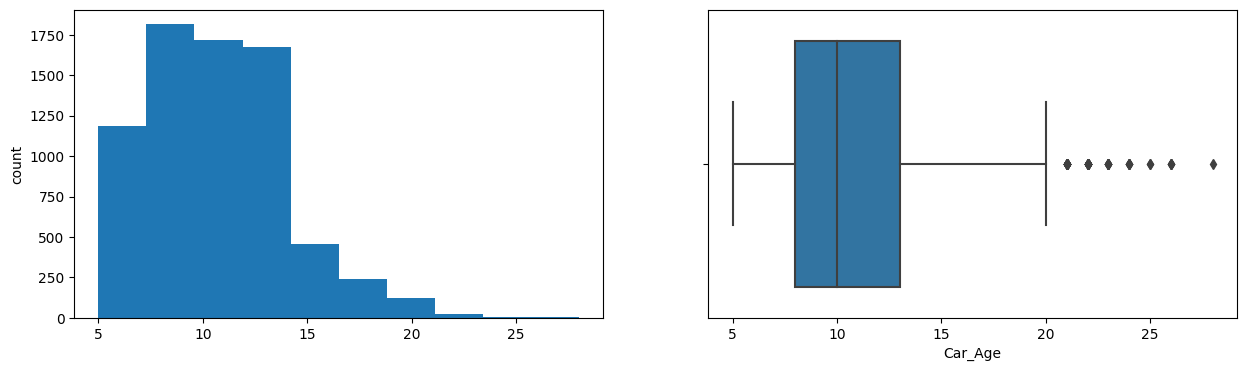

In [94]:
for col in num_cols:
    print(col)
    print('Skew :', round(data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()

- El precio y los kilómetros recorridos tienen sesgo hacia la derecha en estos datos y se deben transformar.

- Manejar valores atípicos.

In [ ]:
# Function for log transformation of the column
def log_transform(data,col):
    for colname in col:
        if (data[colname] == 1.0).all():
            data[colname + '_log'] = np.log(data[colname]+1)
        else:
            data[colname + '_log'] = np.log(data[colname])
    data.info()



Visualización de las variables categóricas

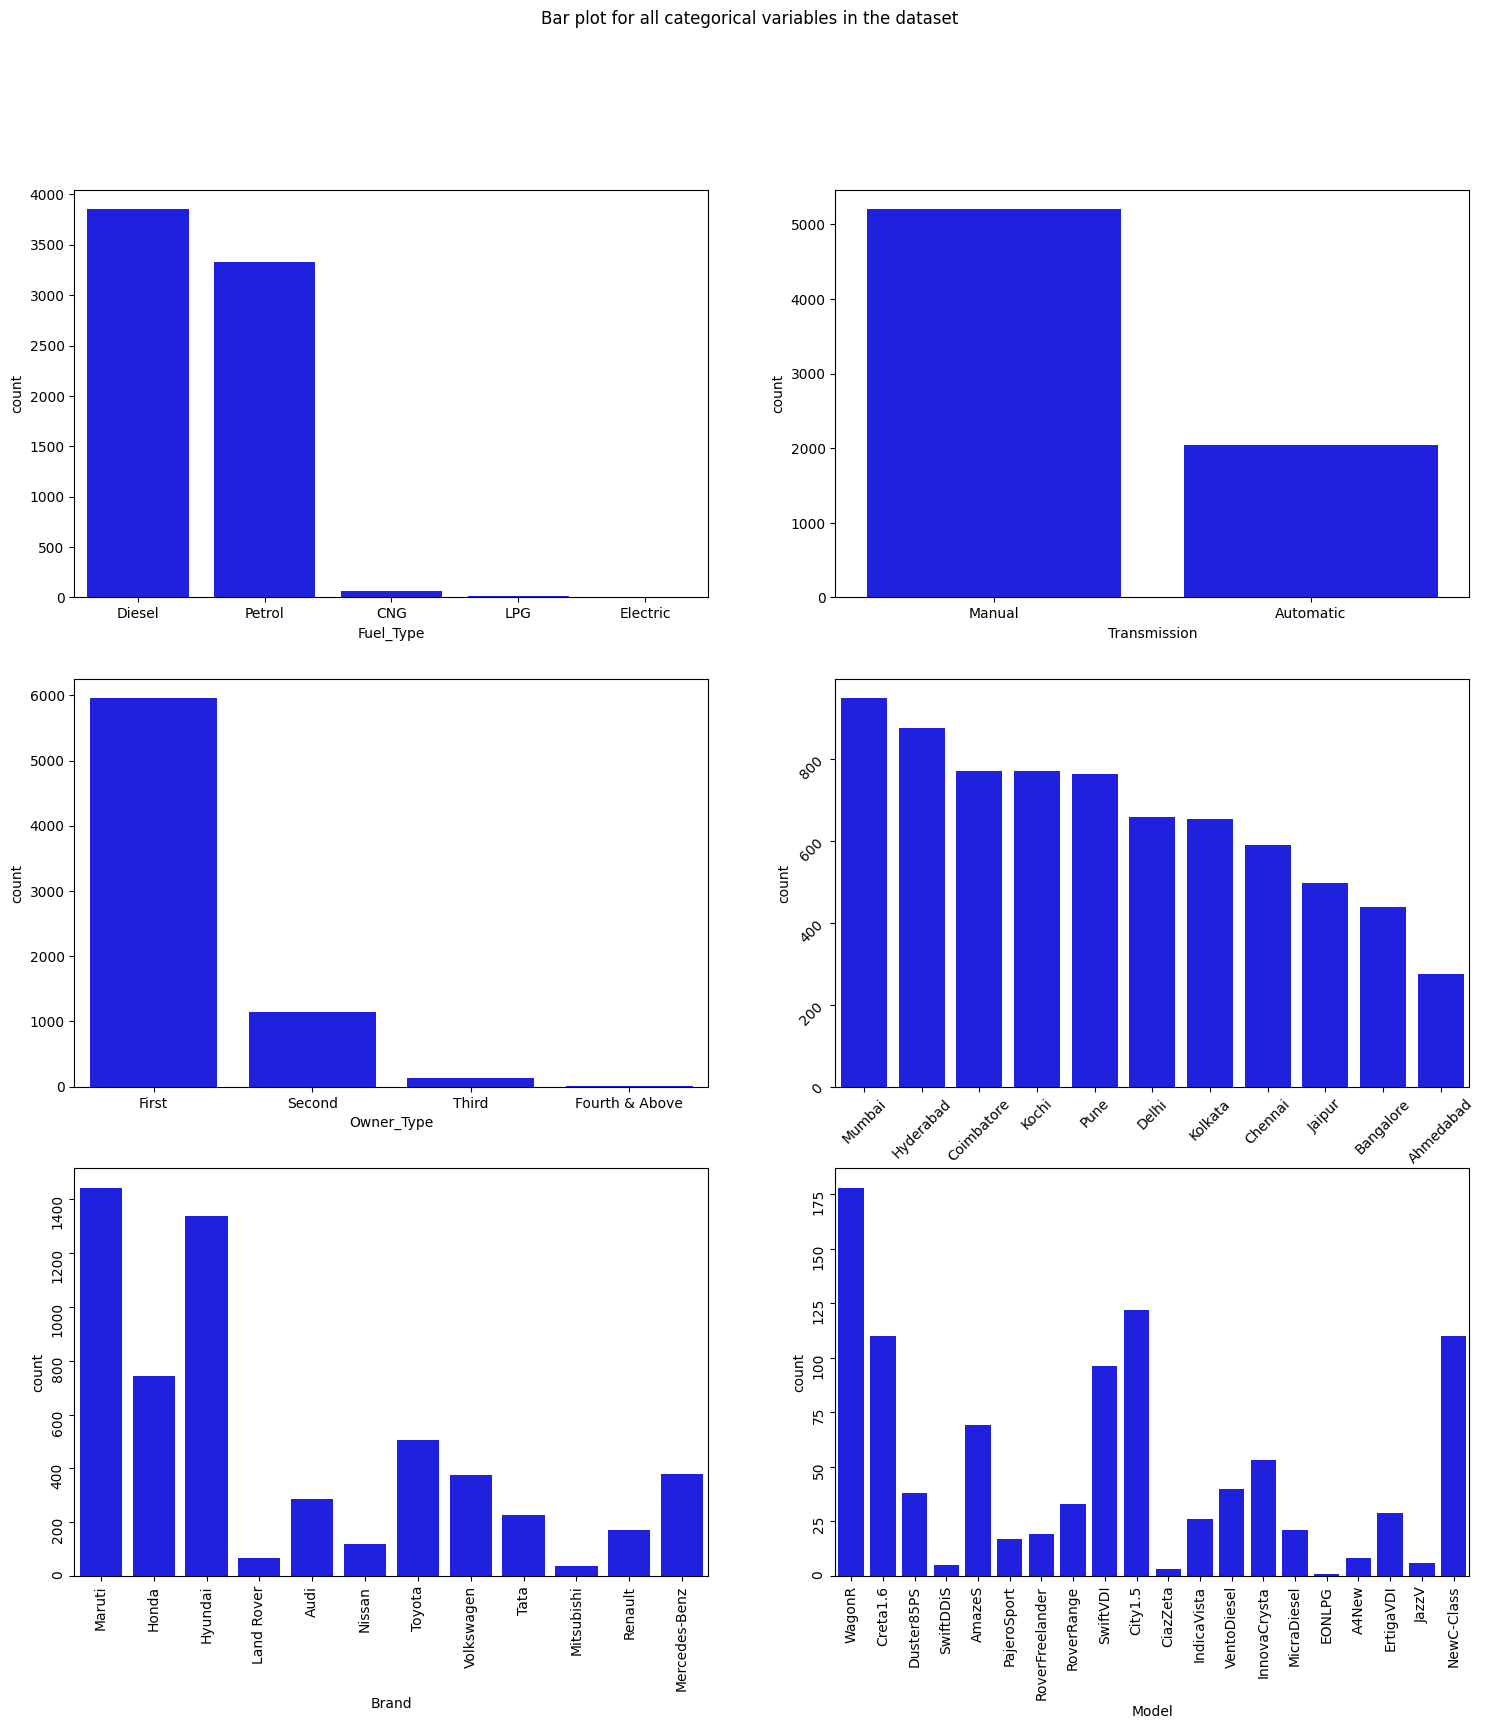

In [95]:
fig, axes = plt.subplots(3, 2, figsize = (18, 18))
fig.suptitle('Bar plot for all categorical variables in the dataset')
sns.countplot(ax = axes[0, 0], x = 'Fuel_Type', data = data, color = 'blue', 
              order = data['Fuel_Type'].value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'Transmission', data = data, color = 'blue', 
              order = data['Transmission'].value_counts().index);
sns.countplot(ax = axes[1, 0], x = 'Owner_Type', data = data, color = 'blue', 
              order = data['Owner_Type'].value_counts().index);
sns.countplot(ax = axes[1, 1], x = 'Location', data = data, color = 'blue', 
              order = data['Location'].value_counts().index);
sns.countplot(ax = axes[2, 0], x = 'Brand', data = data, color = 'blue', 
              order = data['Brand'].head(20).value_counts().index);
sns.countplot(ax = axes[2, 1], x = 'Model', data = data, color = 'blue', 
              order = data['Model'].head(20).value_counts().index);
axes[1][1].tick_params(labelrotation=45);
axes[2][0].tick_params(labelrotation=90);
axes[2][1].tick_params(labelrotation=90);

A partir del gráfico de recuento, podemos hacer las siguientes observaciones:

- Mumbai tiene el mayor número de autos disponibles para la compra, seguido de Hyderabad y Coimbatore.

- Aproximadamente el 53% de los autos tienen combustible diésel.

- Aproximadamente el 72% de los autos tienen transmisión manual.

- Aproximadamente el 82% de los autos son de primera mano. Esto muestra que la mayoría de los compradores prefieren comprar autos de primer dueño.

- Aproximadamente el 20% de los autos pertenecen a la marca Maruti, seguidos por el 19% de los autos que pertenecen a Hyundai.

- El modelo WagonR ocupa el primer lugar entre todos los modelos disponibles para la compra.

### Transformación de datos

Antes de pasar al análisis bivariable, el análisis univariable demostró que algunas variables necesitan ser transformadas.

Las variables de precio y kilómetros recorridos están altamente sesgadas y en una escala mayor. Realicemos una transformación logarítmica.
La transformación logarítmica puede ayudar en la normalización, de modo que esta variable pueda mantener una escala estándar con otras variables.

In [100]:
# Function for log transformation of the column
def log_transform(data,col):
    for colname in col:
        if (data[colname] == 1.0).all():
            data[colname + '_log'] = np.log(data[colname]+1)
        else:
            data[colname + '_log'] = np.log(data[colname])

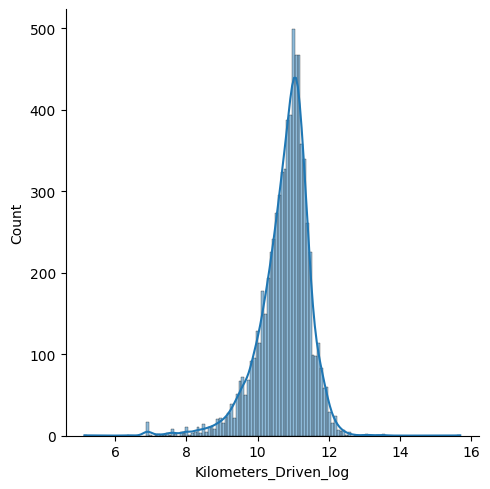

In [125]:
log_transform(data,['Kilometers_Driven','Price'])
sns.displot(data["Kilometers_Driven_log"], kde=True)

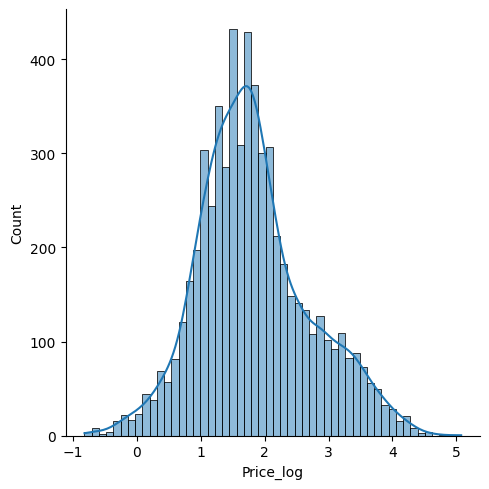

In [121]:
sns.displot(data["Price_log"], kde=True)

### Análisis bivariable: 

Ahora, avancemos con el análisis bivariable. 

El análisis bivariable ayuda a comprender cómo se relacionan las variables entre sí y la relación entre las variables dependientes e independientes presentes en el conjunto de datos.

Para variables numéricas, se utilizan ampliamente los gráficos de pares (pair plots) y los gráficos de dispersión (scatter plots) para realizar el análisis bivariable.

Se puede utilizar un gráfico de barras apiladas para variables categóricas si la variable de salida es un clasificador. Se pueden utilizar gráficos de barras si la variable de salida es continua.

Nosotros utilizaremos un gráfico de pares para mostrar la relación entre dos variables categóricas.

Posibles preguntas:

- ¿Cuál es la relación entre dos variables numéricas?

- Analizar la distribución de precios: ¿Cómo se distribuyen los precios de los autos usados? ¿Hay patrones o modas en la distribución?

- ¿Cómo se relacionan el precio del auto con características como el año, el kilometraje, el modelo, etc? 

- ¿Cómo disminuye el precio de los autos a medida que envejecen?

- ¿Hay diferencias sistemáticas en los precios de los autos dependiendo de la marca o el modelo?



<Figure size 1300x1700 with 0 Axes>

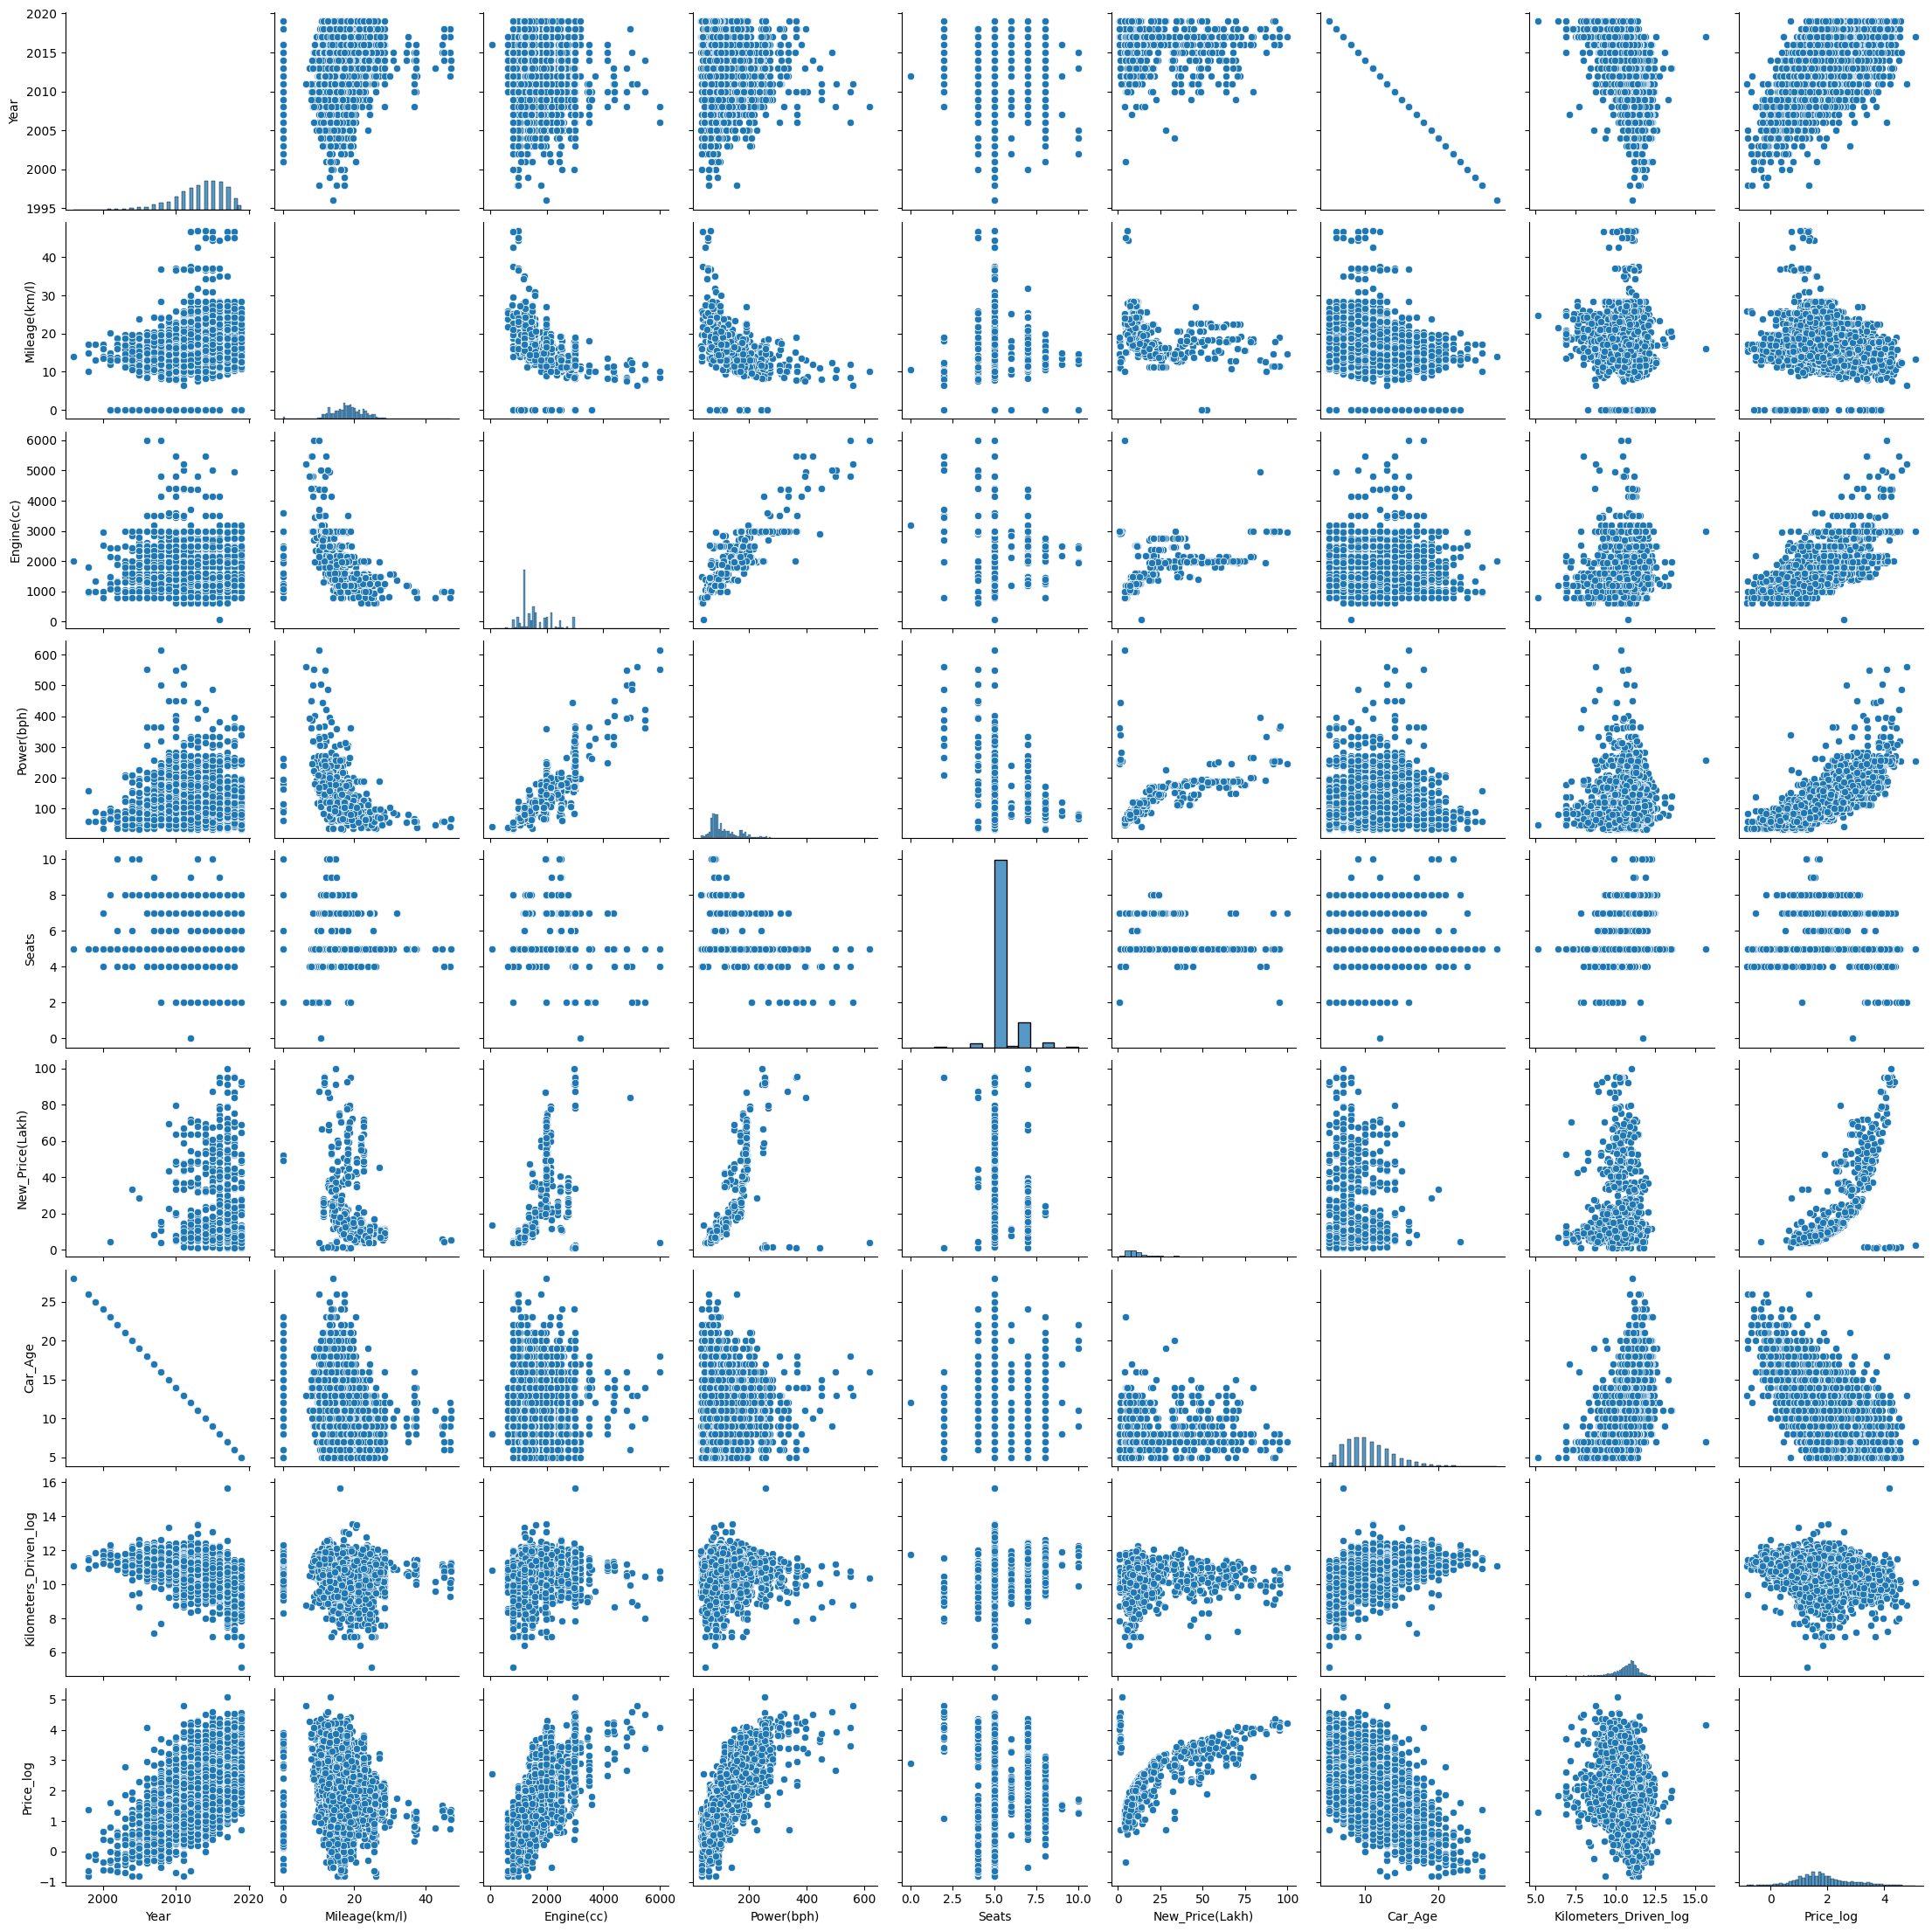

In [105]:
plt.figure(figsize=(13,17))
sns.pairplot(data=data.drop(['Kilometers_Driven','Price'],axis=1))
plt.show()

El gráfico de pares proporciona las siguientes percepciones:

- La variable "Año" tiene una correlación positiva con el precio y el consumo de combustible.
- El año tiene una correlación negativa con los kilómetros recorridos.
- El consumo de combustible tiene una correlación negativa con la potencia. A medida que la potencia aumenta, el consumo de combustible disminuye.
- Los automóviles de fabricación reciente tienen precios más altos. A medida que aumenta la antigüedad del automóvil, el precio disminuye.
- A medida que aumenta el tamaño del motor y la potencia, aumenta el precio del automóvil.

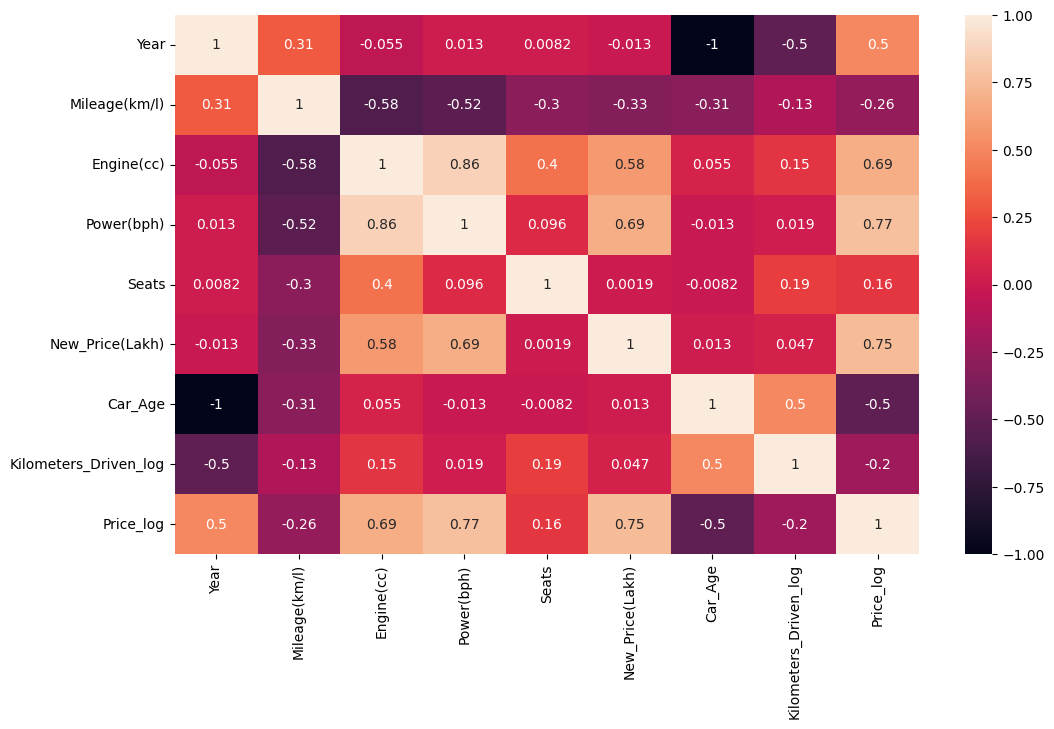

In [107]:
plt.figure(figsize=(12, 7))
sns.heatmap(data.drop(['Kilometers_Driven','Price'],axis=1).corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

A partir del mapa de calor, podemos inferir lo siguiente:

- El motor tiene una correlación positiva fuerte con la potencia de 0.86.
- El precio tiene una correlación positiva con el motor de 0.69, así como con la potencia de 0.77.
- El consumo de combustible tiene una correlación negativa con el motor, la potencia y el precio.
- El precio tiene una correlación positiva moderada con el año.
- Los kilómetros recorridos tienen una correlación negativa con el año, sin mucho impacto en el precio.
- La antigüedad del automóvil tiene una correlación negativa con el precio.
- La antigüedad del automóvil está positivamente correlacionada con los kilómetros recorridos. A medida que aumenta la antigüedad del automóvil, también aumentarán los kilómetros recorridos. El kilometraje tiene una correlación negativa con la antigüedad del automóvil, lo cual tiene sentido.

#### Variables categóricas - Variables continuas

Se puede utilizar un gráfico de barras para mostrar la relación entre variables categóricas y variables continuas.

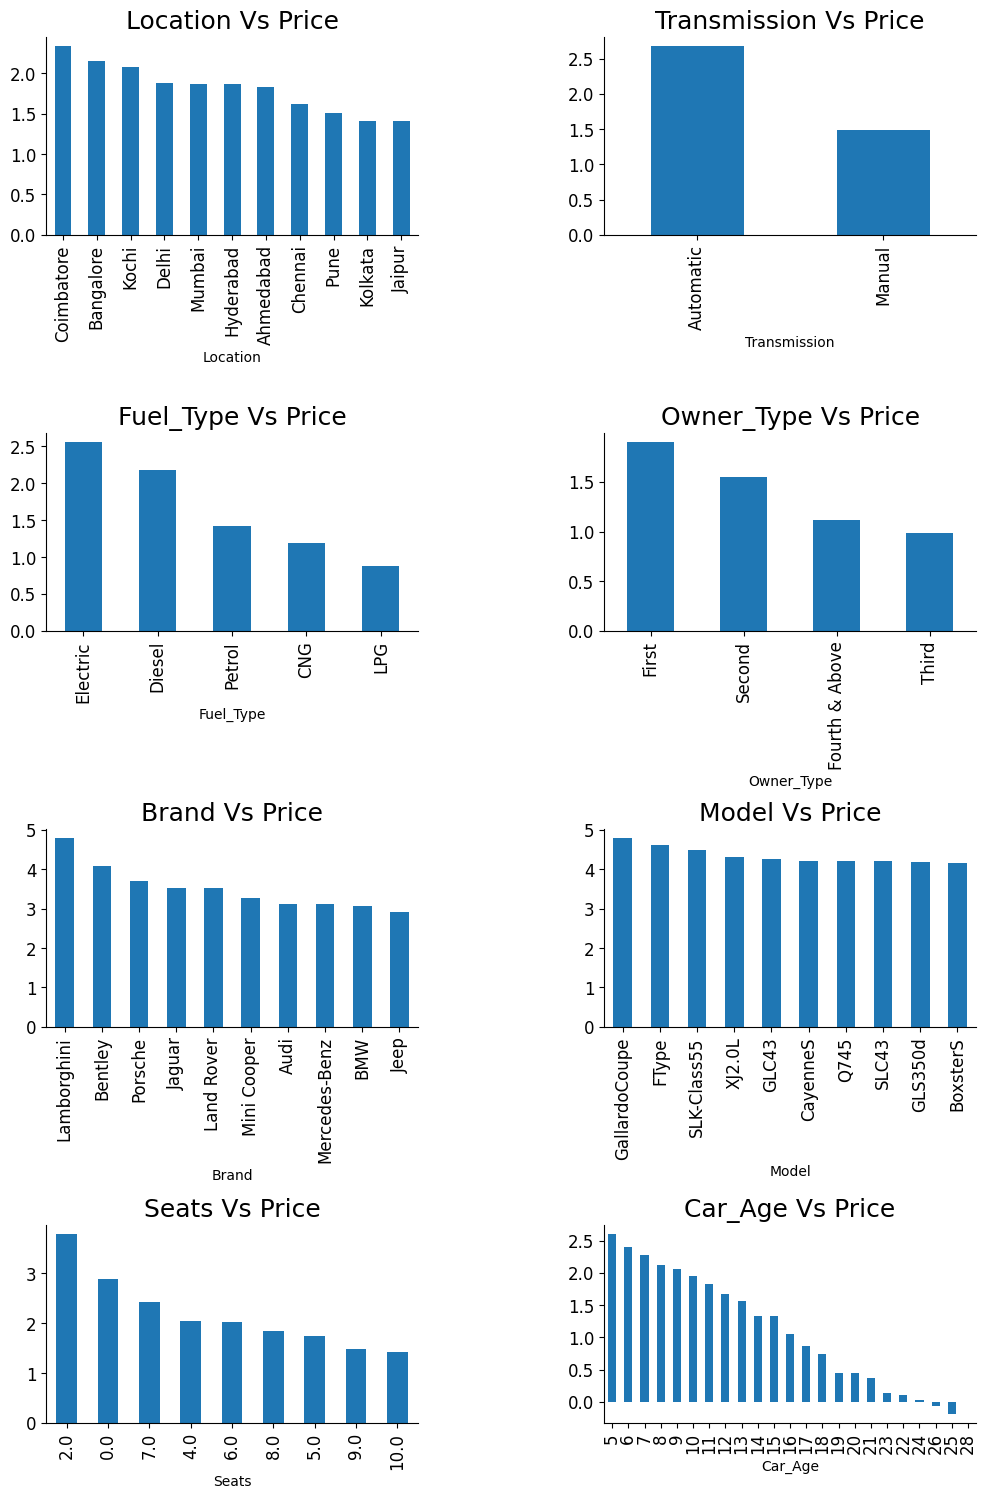

In [106]:
fig, axarr = plt.subplots(4, 2, figsize=(12, 18))
data.groupby('Location')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][0], fontsize=12)
axarr[0][0].set_title("Location Vs Price", fontsize=18)
data.groupby('Transmission')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][1], fontsize=12)
axarr[0][1].set_title("Transmission Vs Price", fontsize=18)
data.groupby('Fuel_Type')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][0], fontsize=12)
axarr[1][0].set_title("Fuel_Type Vs Price", fontsize=18)
data.groupby('Owner_Type')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][1], fontsize=12)
axarr[1][1].set_title("Owner_Type Vs Price", fontsize=18)
data.groupby('Brand')['Price_log'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[2][0], fontsize=12)
axarr[2][0].set_title("Brand Vs Price", fontsize=18)
data.groupby('Model')['Price_log'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[2][1], fontsize=12)
axarr[2][1].set_title("Model Vs Price", fontsize=18)
data.groupby('Seats')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[3][0], fontsize=12)
axarr[3][0].set_title("Seats Vs Price", fontsize=18)
data.groupby('Car_Age')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[3][1], fontsize=12)
axarr[3][1].set_title("Car_Age Vs Price", fontsize=18)
plt.subplots_adjust(hspace=1.0)
plt.subplots_adjust(wspace=.5)
sns.despine()

Observaciones:
- El precio de los autos es alto en Coimbatore y tiene un precio más bajo en Kolkata y Jaipur.

- Los autos automáticos tienen un precio más alto que los autos manuales.

- Los autos diésel y eléctricos tienen casi el mismo precio, que es el máximo, mientras que los autos a gas tienen el precio más bajo.

- Los autos de primer dueño tienen un precio más alto, seguidos por los de segundo dueño.

- El precio de los autos de tercer dueño es menor que el de los cuartos dueños en adelante.

- La marca Lamborghini tiene el precio más alto.

- El modelo Gallardocoupe tiene el precio más alto.

- Los autos de 2 plazas tienen el precio más alto, seguidos por los de 7 plazas.

- Los autos del modelo más reciente tienen un precio alto.

## Imputación de valores faltantes

- Los datos faltantes surgen en casi todos los análisis estadísticos. Hay muchas formas de imputar valores faltantes; podemos imputar los valores faltantes utilizando su media, mediana, valor más frecuente o cero, y utilizar algoritmos avanzados de imputación como KNN (vecinos más cercanos), regularización, etc.

- No podemos imputar los datos con una simple media/mediana. Necesitamos tener conocimiento del negocio o ideas comunes sobre los datos. Si tenemos conocimiento del dominio, agregará valor a la imputación. Algunos datos se pueden imputar en base a suposiciones.

- En nuestro conjunto de datos, hemos encontrado que hay valores faltantes en muchas columnas como Consumo de combustible (Mileage), Potencia (Power) y Asientos (Seats).

- Observamos anteriormente que algunas observaciones tienen un consumo de combustible de cero. Esto parece ser un problema de entrada de datos. 
Podríamos solucionarlo llenando los valores nulos con cero y luego utilizando el valor promedio del consumo de combustible, ya que la media y la mediana son casi iguales para esta variable. Por lo tanto, elegimos la media para imputar los valores.

- De manera similar, la imputación para los asientos. Como mencionamos anteriormente, necesitamos conocer ideas comunes sobre los datos.
Algunas marcas y modelos de automóviles tienen características como motor, consumo de combustible, potencia y número de asientos que son casi iguales. Vamos a imputar esos valores faltantes utilizando los datos existentes:

In [110]:
data.loc[data["Mileage(km/l)"]==0.0,'Mileage(km/l)']=np.nan
data['Mileage(km/l)'].isnull().sum()
data['Mileage(km/l)'].fillna(value=np.mean(data['Mileage(km/l)']),inplace=True)

In [111]:
data.Seats.isnull().sum()
data['Seats'].fillna(value=np.nan,inplace=True)
data['Seats']=data.groupby(['Model','Brand'])['Seats'].apply(lambda x:x.fillna(x.median()))
data['Engine(cc)']=data.groupby(['Brand','Model'])['Engine(cc)'].apply(lambda x:x.fillna(x.median()))
data['Power(bph)']=data.groupby(['Brand','Model'])['Power(bph)'].apply(lambda x:x.fillna(x.median()))

En general, no hay reglas definidas o perfectas para imputar valores faltantes en un conjunto de datos. 

Cada método puede funcionar mejor para algunos conjuntos de datos, pero puede funcionar aún peor en otros. 

Solo la práctica y los experimentos nos brindan el conocimiento de cuál método funciona mejor.

## Outliers

In [ ]:
# TODO

## Conclusiones

A través del EDA (Análisis Exploratorio de Datos), obtuvimos información útil acerca del conjunto de datos con el que estamos trabajando.

A continuación se muestran los factores que influyen en el precio del automóvil y algunas conclusiones:

- La mayoría de los clientes prefieren automóviles de 2 plazas, por lo tanto, el precio de los automóviles de 2 plazas es más alto que el de otros automóviles.
- El precio del automóvil disminuye a medida que aumenta la antigüedad del automóvil.
- Los clientes prefieren comprar automóviles del primer propietario en lugar del segundo o tercer propietario.
- Los clientes prefieren comprar vehículos eléctricos. Esto puede deberse al aumento del precio del combustible. 
- La transmisión automática es más cómoda que la manual.

De esta manera, realizamos un EDA en los conjuntos de datos para explorar los datos y extraer todas las posibles percepciones, lo cual puede ayudar en la construcción de modelos y la toma de decisiones más acertadas.

Sin embargo, esto fue solo una visión general de cómo funciona el EDA; puedes adentrarte más en él y aplicar las etapas en conjuntos de datos más grandes.

## Homework

- Utiliza lo aprendido sobre la detección y tratamiento de missings y outliers para mejorar la calidad de los datos

- Construye un modelo para predecir el precio de los carros usados. 

Sugerencia: Prueba con varios modelos utilizados y compara su performance 